<a href="https://colab.research.google.com/github/salwaadalla/VisaApprovalAnalyzer/blob/main/Easy_visa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/EasyVisa.csv')

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
data.shape

(25480, 12)

* There are 25480 observations and 12 columns in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.duplicated().sum()

0

* `no_of_employees`, ` yr_of_estab`, and `prevailing_wage` are numeric features while rest are objects.
* There are no null values in the dataset.
* There are no duplicates in the data.

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There is a negative value in number of employess need to be fixed.
* The year of establishment of companies ranges from 1800 to 2016, which seems fine.
* The average prevailing wage is 74455.81. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.

In [ ]:
negative_values = data[data["no_of_employees"] < 0]
print(negative_values.shape)

(33, 12)


* We will consider the 33 observations as data entry errors and take the absolute values for this column.

In [ ]:
negative_values.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.14,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.94,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.46,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.97,Hour,Y,Denied


In [ ]:
data["no_of_employees"] = abs(data["no_of_employees"])

In [ ]:
data[data["no_of_employees"] < 0].sum()

case_id                    0
continent                  0
education_of_employee      0
has_job_experience         0
requires_job_training      0
no_of_employees            0
yr_of_estab                0
region_of_employment       0
prevailing_wage          0.0
unit_of_wage               0
full_time_position         0
case_status                0
dtype: object

* No negative values left.

In [ ]:
cat_col = list(data.select_dtypes("object").columns)
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

* Most of the applications in data are from Asians followed by Europeans.

* Most of the applicants have a bachelor's degree followed by a master's degree.

* Most of the applicants have job experience and do not require job training.

* Most applicants have their worksite in the Northeast region of the US.

* Most applicants will yearly unit of wage.

* Most of the visa applications are for full-time job positions.

* The target column case status is imbalanced with many applicants having a certified visa.


In [ ]:
data["case_id"].nunique()

25480

* Case Id has the same number of rows in the data.
* Case Id is a unique number, the column will not help in the analysis it will be droped.

In [ ]:
data.drop(["case_id"], axis=1, inplace=True)

## Data Preprocessing


In [ ]:
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There is no missing values in the data.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )

## EDA

- It is a good idea to explore the data once again after manipulating it.

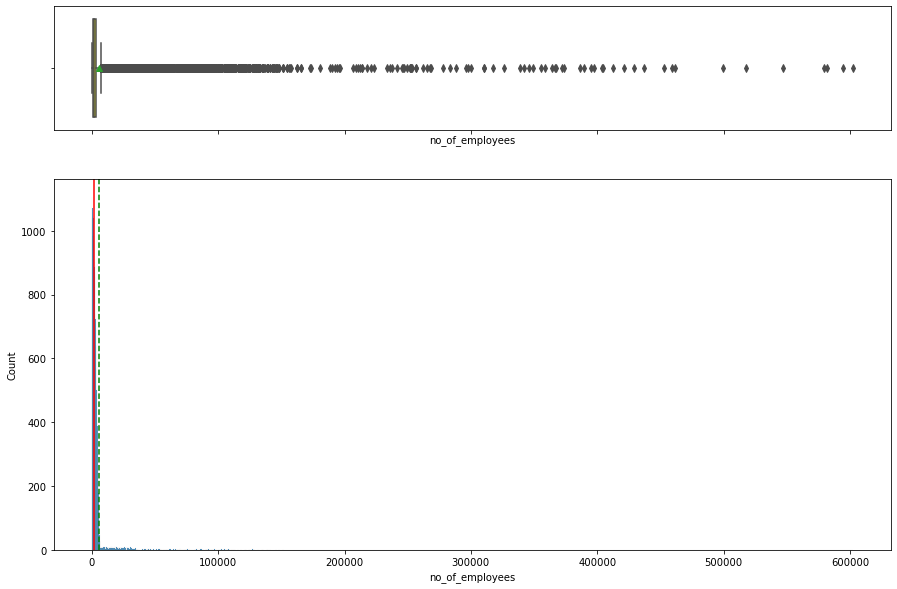

In [ ]:
histogram_boxplot(data, "no_of_employees")

* Number of employees is heavily right skewed.

* Some companies have more than 500k employees. Such companies might have multiple offices around the world.

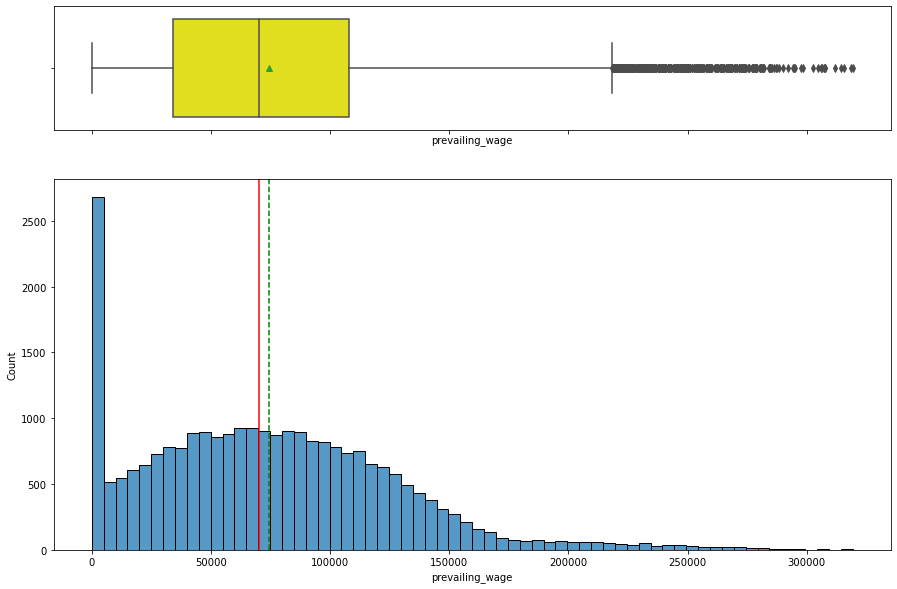

In [ ]:
histogram_boxplot(data, "prevailing_wage")

* The prevailing wage is right-skewed with a mean of 74,455.81 per year.
* There are some job roles where the prevailing wage is more than 200k.
* The distribution shows some applicats having a prevailig wage around 0 thats need checking.

In [ ]:
data.loc[data['prevailing_wage']<100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


* The unit of the wage for these observations is hours

In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

* All the under payed employees are on hourly payment role. This makes sense and confirms and confirms that these observations are not unusual.

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    plt.show()

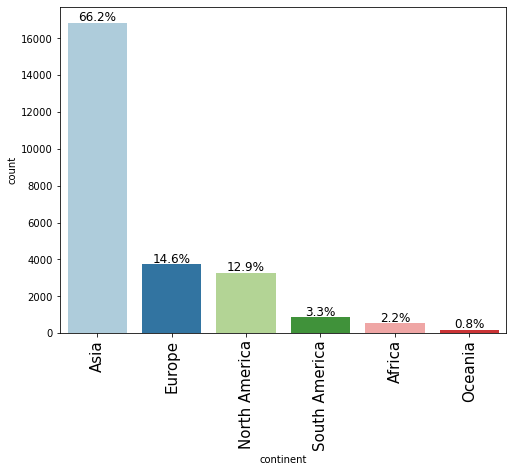

In [ ]:
labeled_barplot(data, "continent", perc=True)

* More than half (66.2%) of the applicants are from Asia, followed by 14.6% of the applications from Europe.

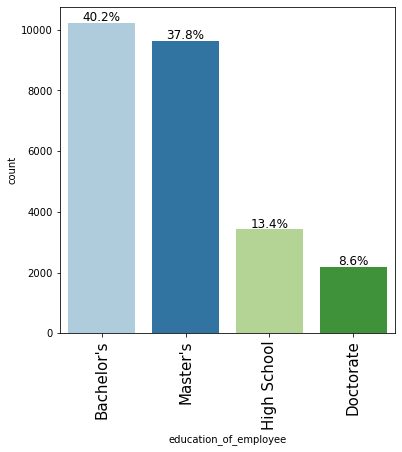

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

* 40.2% of the applicants have a bachelor's degree, followed by 37.8% having a master's degree.
* 8.6% of the applicants have a doctorate degree.

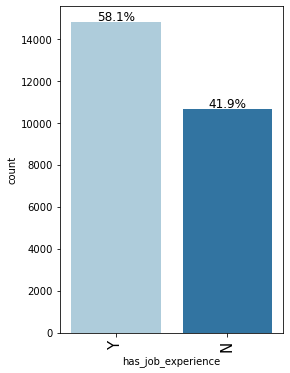

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

* 58.1% of the employees do have job eperience.
* 41.9% of the employees do not have job eperience.

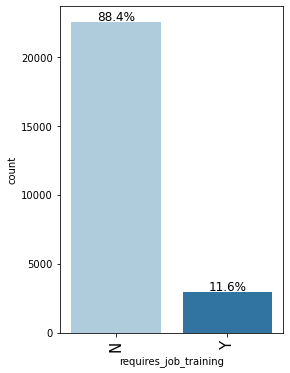

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

* 88.4% of the employees do not require job training.
* 11.6% of the employees require job training.

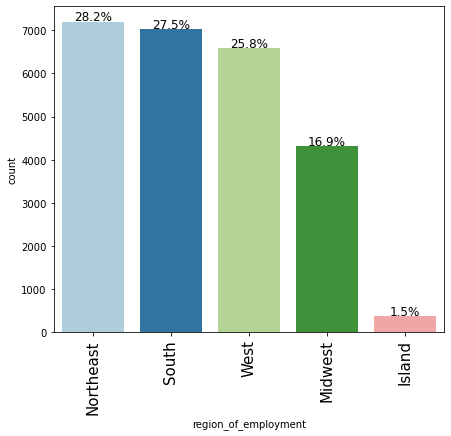

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

* Northeast, South, and West have almost equal percentages of applicants. (25%-28%)
* The Island regions have only 1.5% of the applicants.

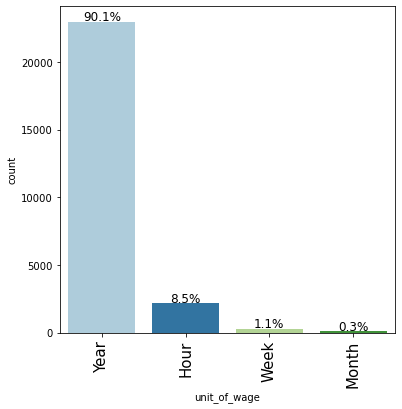

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

* Almost all the employees are on yearly payroll (90.1%), followed by 8.5% of the applicants having hourly wages.

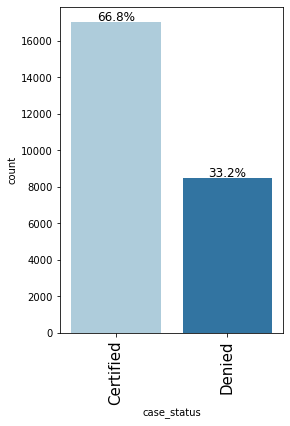

In [ ]:
labeled_barplot(data, "case_status", perc=True)

* 66.8% of the employees got there visa certified.
* 33.2% of the employees got there visa Denied.

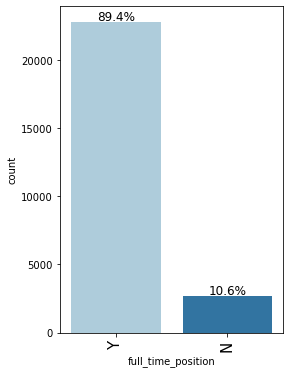

In [ ]:
labeled_barplot(data, "full_time_position", perc=True)

* 89.4% of employees are in a full time position
* 10.6% of employees are not in a full time position

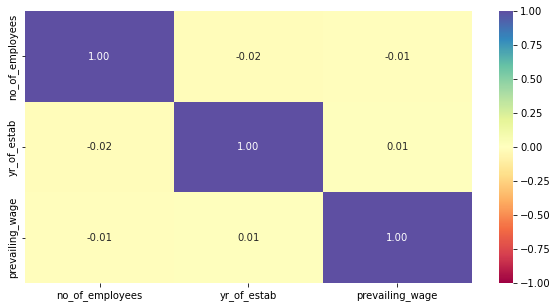

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There's no correlation within the independent features of the data.

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Higher education employees may want to travel abroad for well paid jobbs:

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


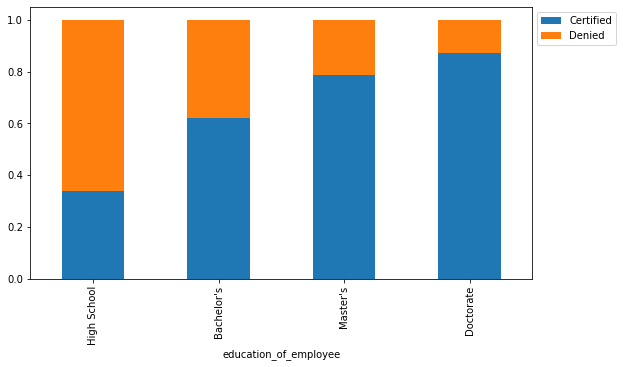

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

* The total number of cases is 25,480, out of these, 17,018 cases are certified, and 8,462 cases are denied.

* The majority of cases are associated with employees holding a Master's degree followed by bachelor's degree holders.

* The highest number of certifications is for employees with a Master's degree where 80% were certified and 20% where denied.

* Employees with a Bachelor's degree also have a significant number of applicant where 60% were certified and 40% where denied.

* Employees with a Doctorate have the lowest number of cases but also the lowest number of denials 15%, suggesting a higher success rate in certification for this group.

* High school applicants have the highest denial cases percent where 65% of the cases where denied.

* In conclusion education seems to have a positive relationship with the certification of visa that is higher the education higher are the chances of visa getting certified.

Different regions have different requirements for ducational backgrounds:

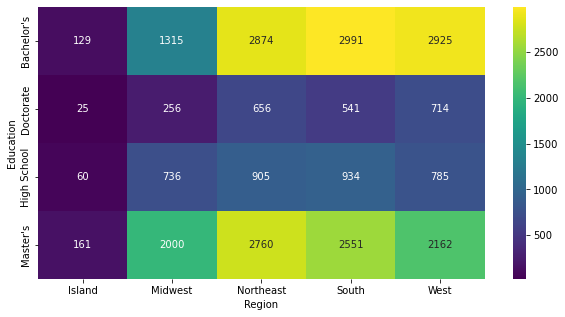

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'],data['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis")
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
* The requirement for Bachelor's is mostly in South region, followed by West region.
* The requirement for Master's is most in Northeast region, followed by South region.
* The requirement for Doctorate's is mostly in West region, followed by Northeast region.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


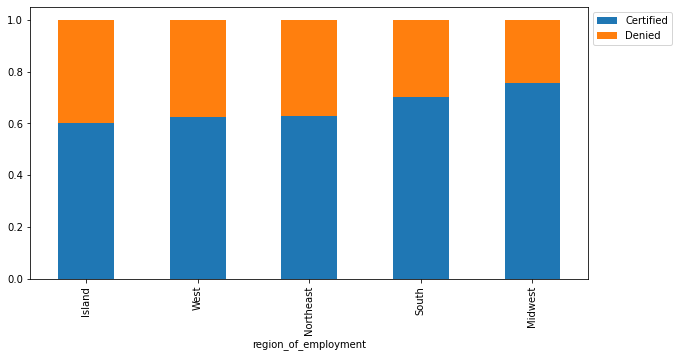

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

* The Midwest region has the highest percentage of certifications (75.5%) among the regions.

* The South region also has a high percentage of certifications (70.0%).

* Island, West, and Northeast region has an almost equal percentage of visa certifications.


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


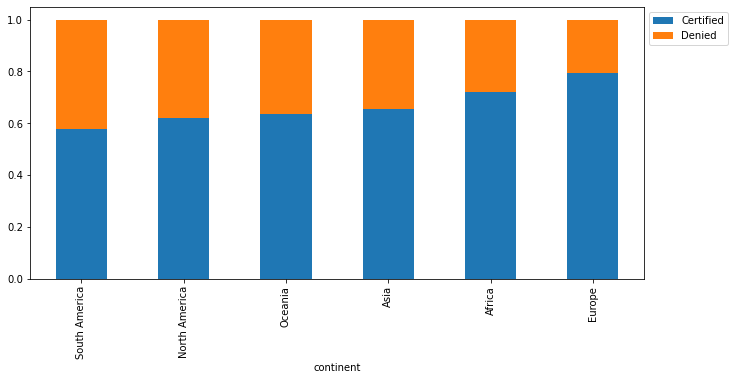

In [ ]:
stacked_barplot(data, "continent", "case_status")

* Applications from Europe and Africa have a higher chance of getting certified.
* Around 80% of the applications from Europe are certified.
* Asia has the third-highest percentage (Around 60%) of visa certification and has the highest number of applications.
* North America, South America, and Oceania have relatively balanced certification percentages.


case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


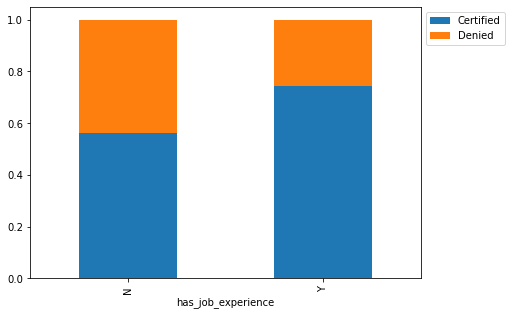

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

* Applicants with job experience have a significantly higher certification rate 75% compared to those without job experience at 57%.
* The presence of job experience seems to be a significant factor influencing the certification decision.

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


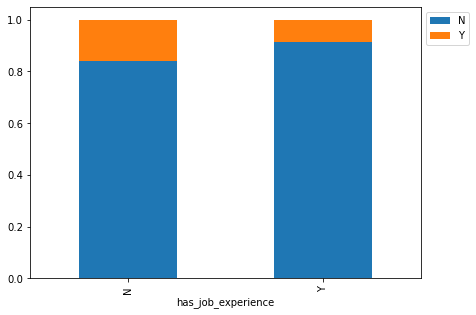

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

* The majority of visa applications, regardless of job experience, do not require job training.
* 90% of applicants with job experience do not require job training.

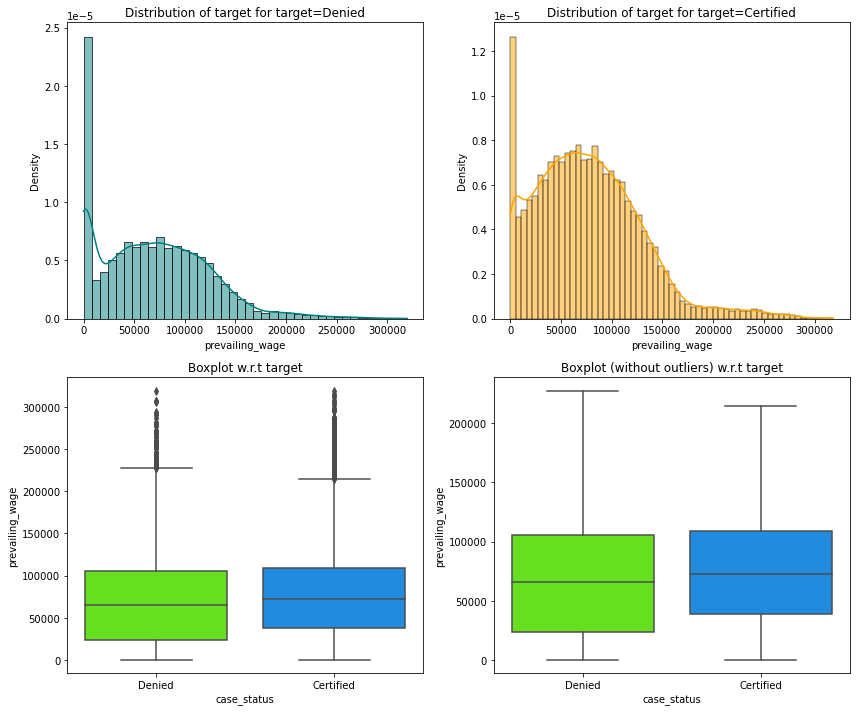

In [ ]:
distribution_plot_wrt_target(data,'prevailing_wage','case_status')

* Seems like the prevailing wage dose not have a big effect on the case status.
* Both graphs for case status and prevailing wage is right-skewed.
* Employees with prevailing wage under 45000 are more likely to be denied.

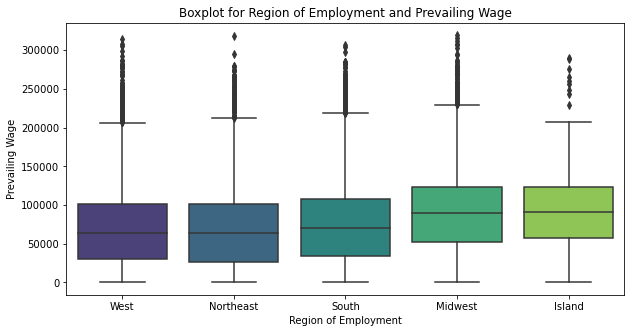

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=data, palette="viridis")
plt.title("Boxplot for Region of Employment and Prevailing Wage")
plt.xlabel("Region of Employment")
plt.ylabel("Prevailing Wage")
plt.show()

* Island and Midwest regions have higher prevailing wage compared to other regions.
*  The distribution of prevailing wage is similar across West, Northeast, and South regions.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


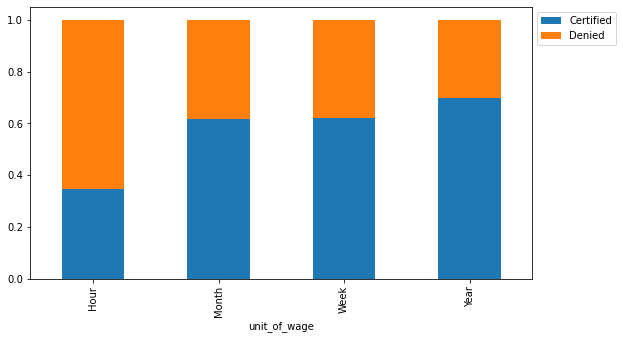

In [ ]:
stacked_barplot(data,'unit_of_wage', 'case_status')

* For cases with a "Year" unit of wage, certifications make up 70%, with denials at 30%. This unit dominates the dataset, contributing significantly to the overall distribution.

* Cases with an "Hour" unit of wage have a 35% certifications and 65% denials cases. This suggests a higher rate of denials in cases where the wage is measured by the hour.

* Cases with "Week" and "Month" units of wage exhibit similar patterns, with certifications at approximately 60%, The denial percentages for these units is 40%.

* In conclusion unit of prevailing wage is an important factor for differentiating between a certified and a denied visa application.

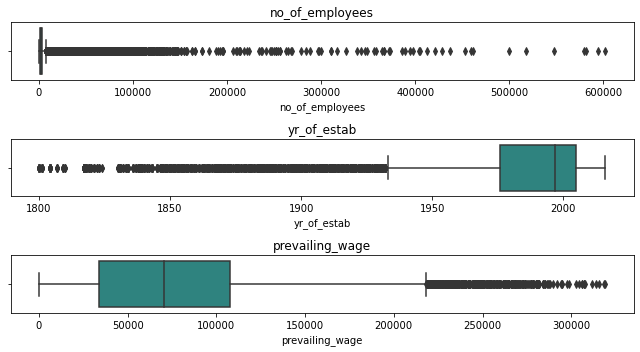

In [ ]:
num_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(9, 5))

for i, variable in enumerate(num_columns, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x=data[variable], whis=1.5, palette="viridis")
    plt.tight_layout()
    plt.title(variable)

plt.show()

* The presence of outliers in the dataset appears to be justifiable, and as such, there is no intention to modify or remove them.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
X = data.drop('case_status', axis=1)
Y = data["case_status"]
X = pd.get_dummies(X,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Building bagging and boosting models

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision tree:

In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


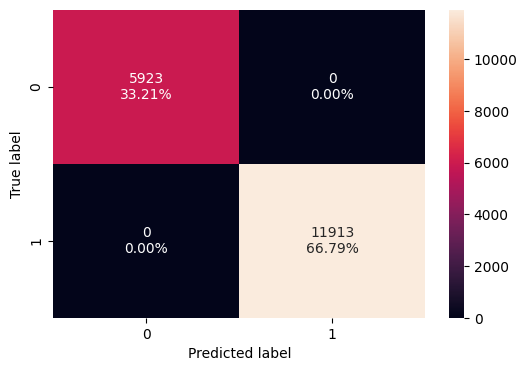

In [ ]:
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
confusion_matrix_sklearn(d_tree,X_train,y_train)

* 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* The decision tree is overfitting the training data.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


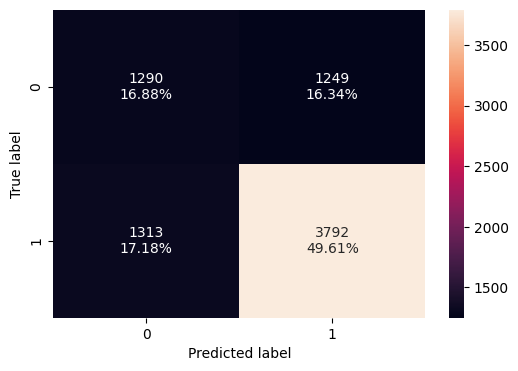

In [ ]:
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Training performance:\n",d_tree_model_test_perf)
confusion_matrix_sklearn(d_tree,X_test,y_test)

* Decision trees it is not overfitting the testing data but it is not generalising the test on the data.
* Decision tree need pruning.

In [ ]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


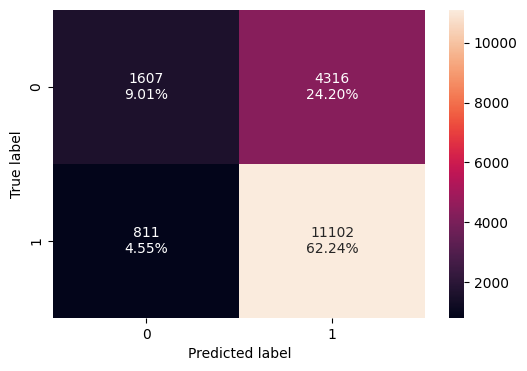

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
confusion_matrix_sklearn(dtree_estimator,X_train,y_train)

* The overfitting has reduced significantly on the training data.

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


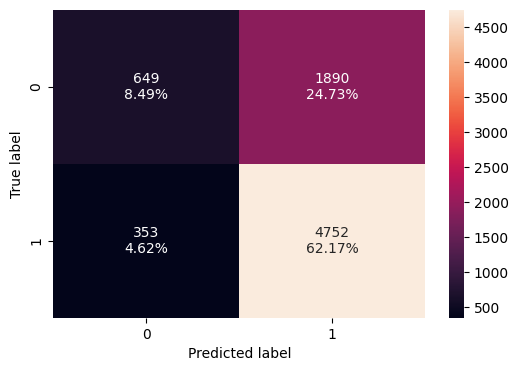

In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The decision tree model has a very high recall but, the precision is less.
* The performance of the model after hyperparameter tuning has become generalized on both test and train data as F1 score of 0.81 and 0.80 on the training and test set, respectively.
* The model performance has improved The accuracy, recall, precision and test f1-score have increased.

# Bagging classifier:

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

   Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


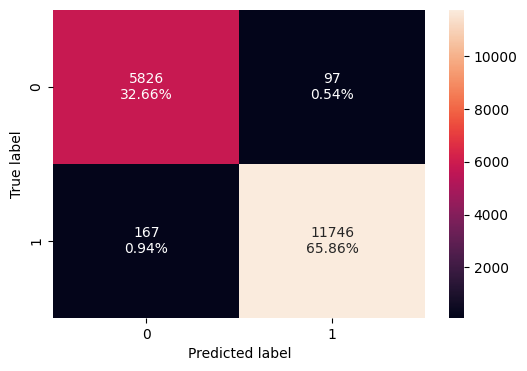

In [ ]:
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
confusion_matrix_sklearn(bagging_classifier,X_train,y_train)

* The model is overfitting the training data.

   Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


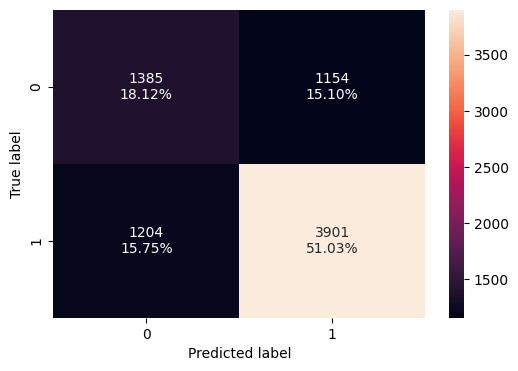

In [ ]:
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* The model is not overfitting the testing data but it is not generalising the test on the data.

In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}
acc_scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154


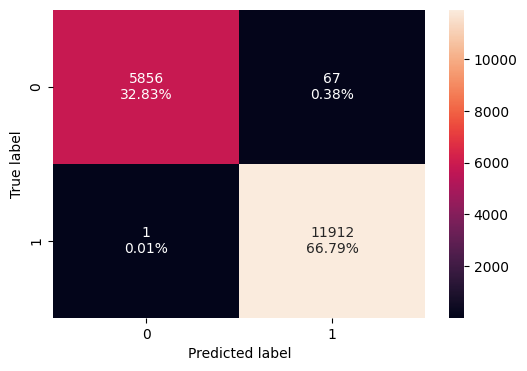

In [ ]:
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

* The model is still overfitting the training data after hyperparameter tuning.

   Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622


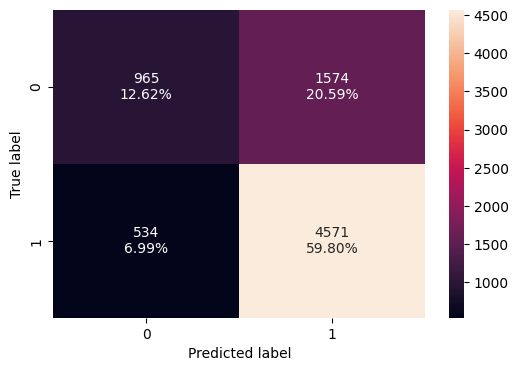

In [ ]:
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* The model performance has improved The accuracy, recall, precision and test f1-score have increased, however the model is not generalising the test on the data.

# Random forest:

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1,class_weight="balanced")
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


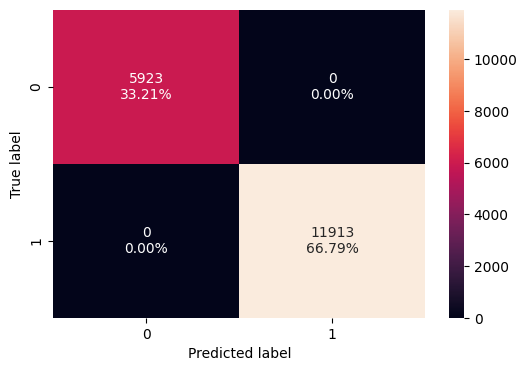

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

* The model is overfitting the training data.

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.727368  0.847209   0.768343  0.805851


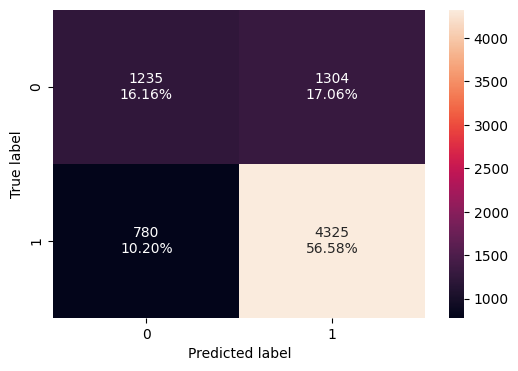

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* The model is not overfitting the testing data but it is not generalising the test on the data.

In [ ]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}
acc_scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652


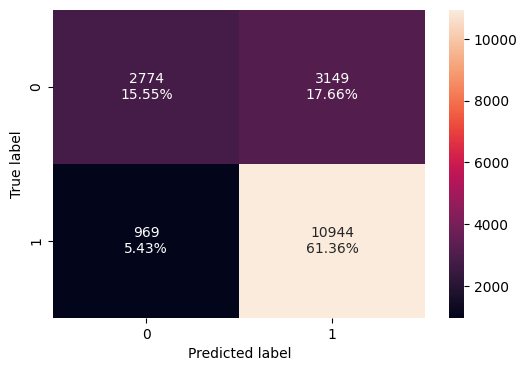

In [ ]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

Testing performance:
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093


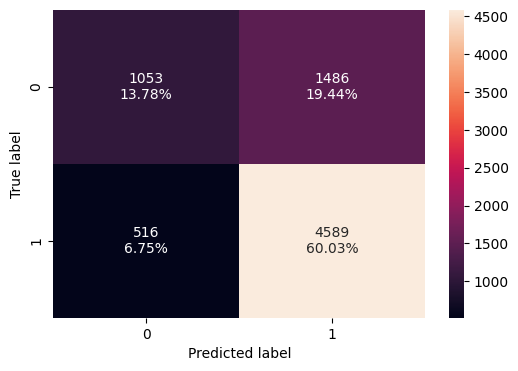

In [ ]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The hyperparameter tuning model giving more generalized performance on both the training and the testing data.
* F1 score is 0.84 and 0.82 for the training and test data, respectively.
* The model has a high recall and a good precision.

# Boosting

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


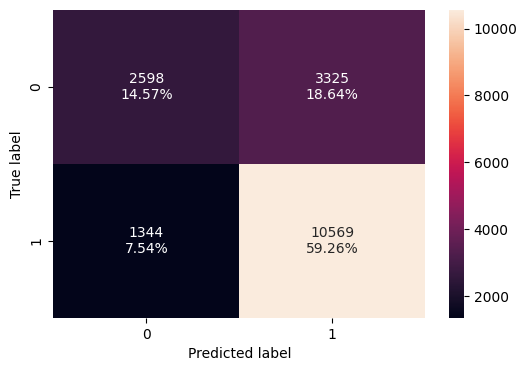

In [ ]:
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


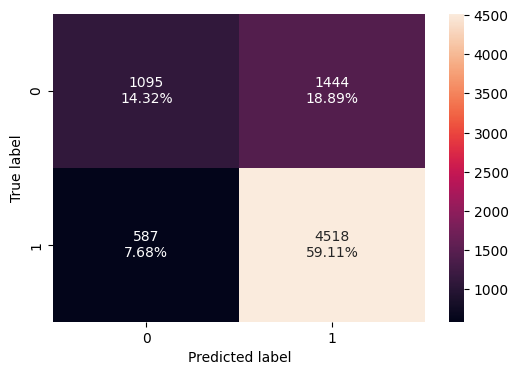

In [ ]:
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance.
* A good F1 score of 0.81 on both the training and test set.

In [ ]:
abc_tuned = AdaBoostClassifier(random_state=1)
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.719163  0.781415    0.79469  0.787997


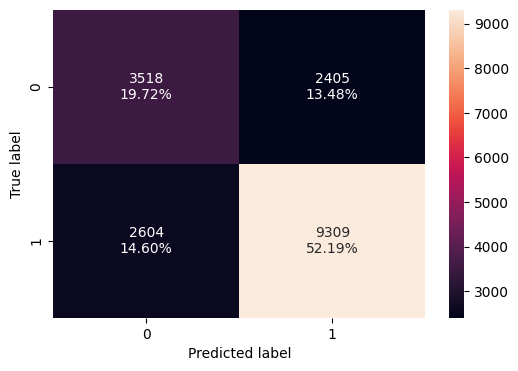

In [ ]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

   Accuracy    Recall  Precision        F1
0  0.716641  0.781587    0.79151  0.786517


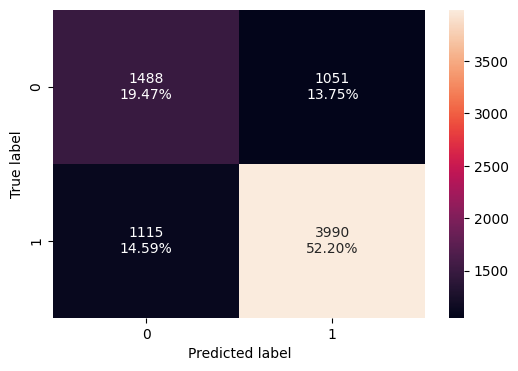

In [ ]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* Surprisingly, the model performance has decreased after hyperparameter tuning.

# Gradient Boosting Classifier:

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


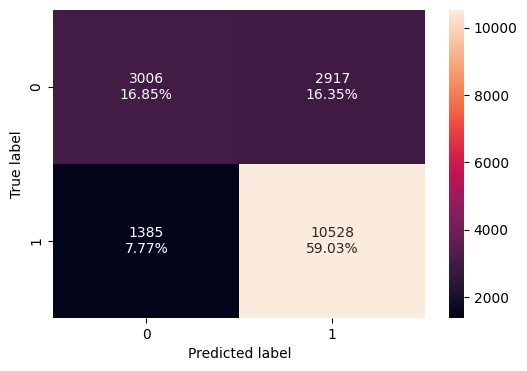

In [ ]:
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


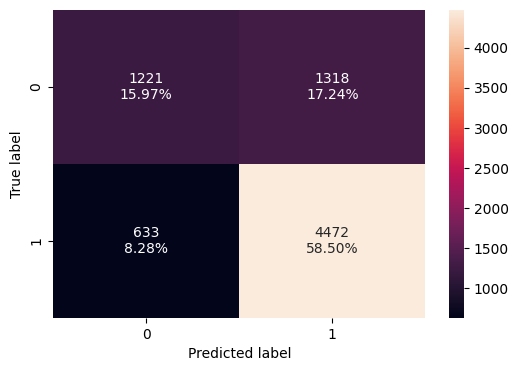

In [ ]:
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The model Gradient boosting is giving generalized performance with slightly higher f1-score than boosting.
* F1 score of 0.83 and 0.82 on the training and test set, respectively.

In [ ]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234


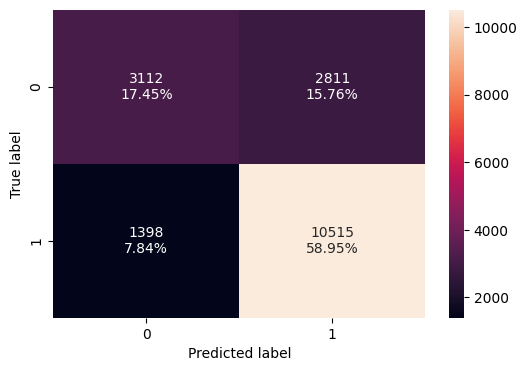

In [ ]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


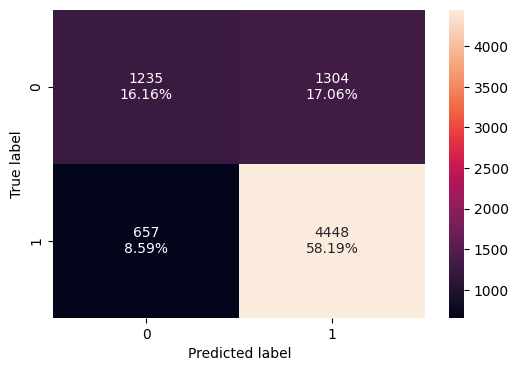

In [ ]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* After tuning there is not much change in the model performance as compared to the model with default values of hyperparameters.

# XGBoost Classifier:

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394


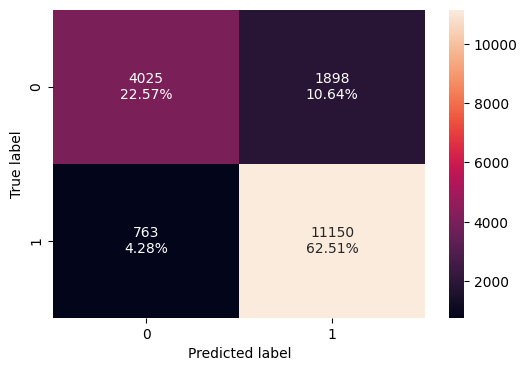

In [ ]:
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143


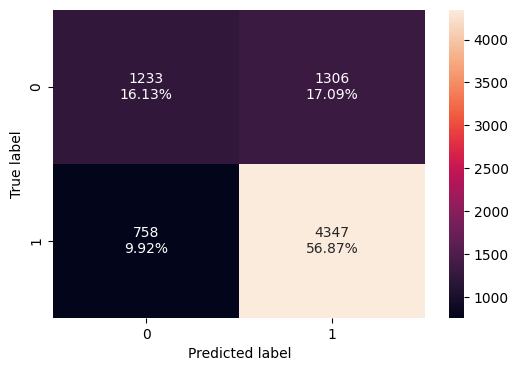

In [ ]:
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* The model is not overfitting the testing or the training data but it is not generalising the test on the data.

In [ ]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.763456  0.881894   0.788857  0.832785


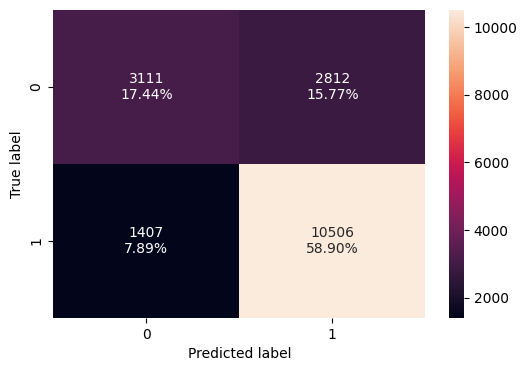

In [ ]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746075  0.872674   0.775322  0.821122


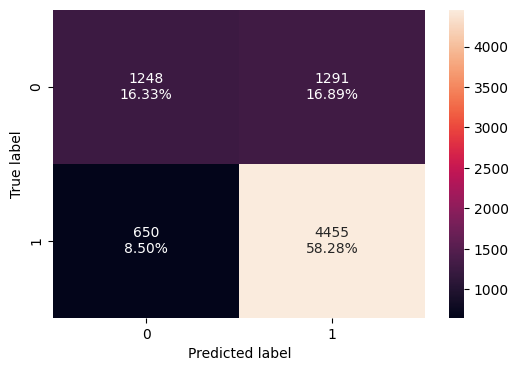

In [ ]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* XGBoost model after tuning is giving a good and generalized performance.
* The F1 score is 0.83 and 0.82 on the training and the test set, respectively.

# Stacking Model:

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ("AdaBoost", ab_classifier)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(random_state=1))],...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Training performance:
    Accuracy   Recall  Precision        F1
0  0.770016  0.89331   0.789876  0.838415


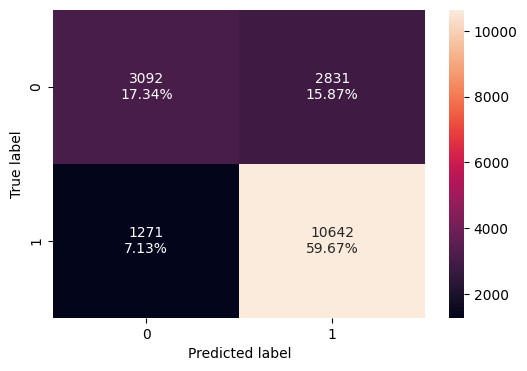

In [ ]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.877767   0.770196  0.820471


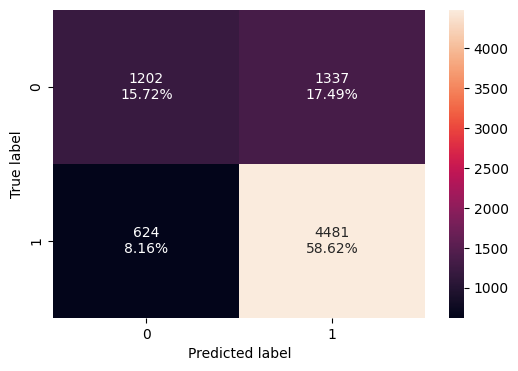

In [ ]:
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* Stacking model has also given a good and generalized performance.
* The performance is comparable to the XGBoost model.
* The F1 scores is 0.83 and 0.81 on the training and test set, respectively.

## Model Performance Comparison and Conclusions

In [ ]:
models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,1.0,0.769119,0.738226,0.719163,0.758802,0.764017,0.850807,0.763456,0.770016
Recall,1.0,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.781415,0.883740,0.882649,0.935952,0.881894,0.893310
Precision,1.0,0.720067,0.991810,0.994407,1.0,0.776556,0.760688,0.794690,0.783042,0.789059,0.854537,0.788857,0.789876
F1,1.0,0.812411,0.988887,0.997154,1.0,0.841652,0.819080,0.787997,0.830349,0.833234,0.893394,0.832785,0.838415


In [ ]:
models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716641,0.744767,0.743459,0.729984,0.746075,0.743459
Recall,0.742801,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781587,0.876004,0.871303,0.851518,0.872674,0.877767
Precision,0.752232,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791510,0.772366,0.773296,0.768972,0.775322,0.770196
F1,0.747487,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786517,0.820927,0.819379,0.808143,0.821122,0.820471


* The majority of the models are overfitting the training data in terms of f1-score.
*  Tuned Random Forest model has given a good and generalized performance it will be used as a final model.
* With the tuned random forest model, the F1 score is 0.84 and 0.82 on the training and the test set, respectively.

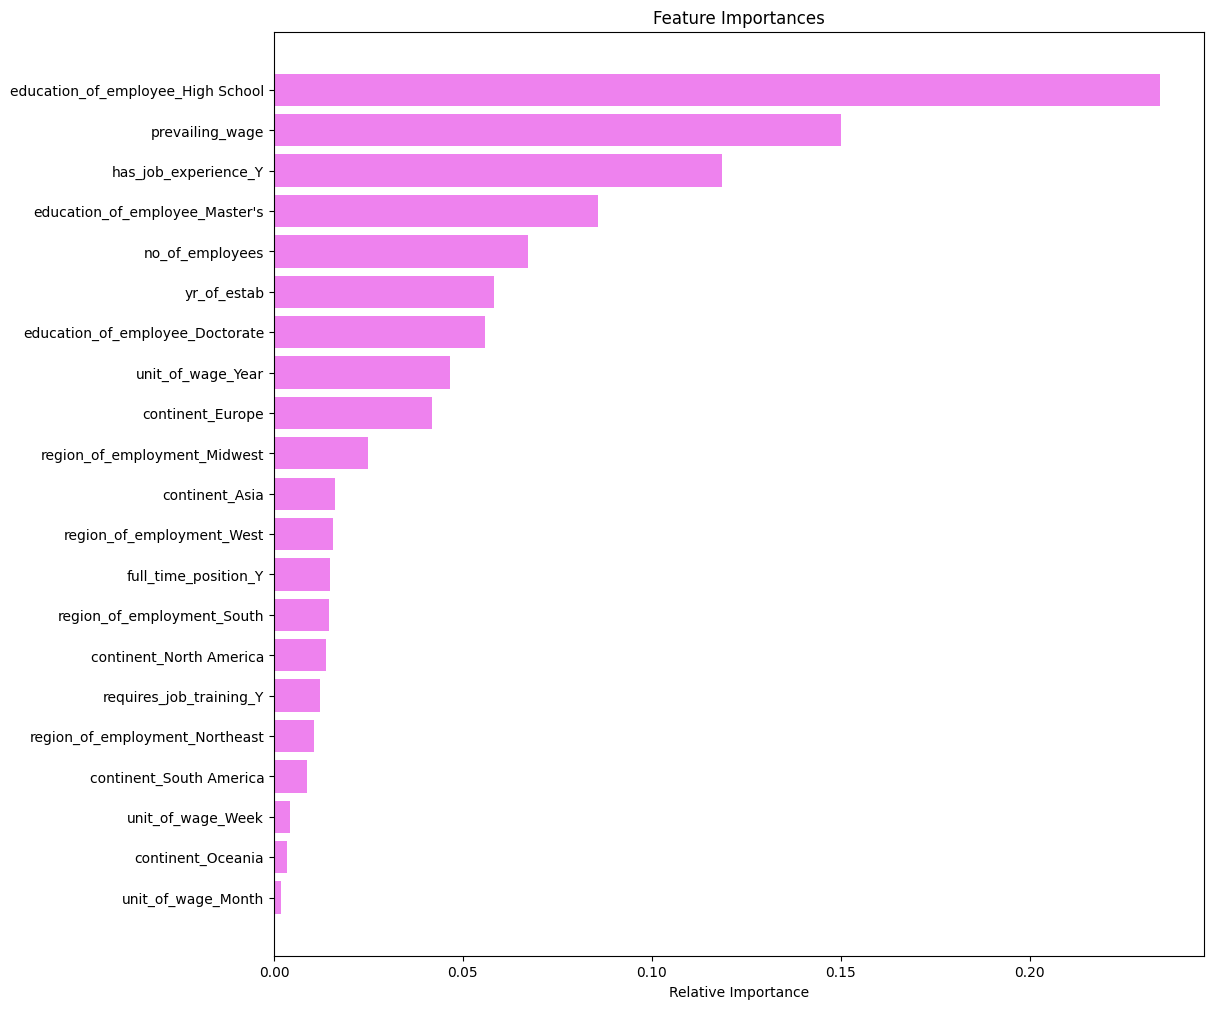

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The feature importance of the Random Forest model shows the top three important features to look for while certifying a visa are:

 1. Education of the employee

 2. Job experience

 3. Prevailing Wage.

## Actionable Insights and Recommendations

**The profile of the applicants for whom the visa status can be approved:**

**Primary information to look at:**

- `Education level` - At least has a Bachelor's degree - Master's and doctorate are preferred.
- `Job Experience` - Should have some job experience.
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 72k.

**Secondary information to look at:**

- `Unit of Wage`    - Applicants having a yearly unit of wage.
- `Continent`       - It has been observed from the analysis that applicants from Europe, Africa, and Asia have higher chances of visa certification.
- `Region of employment` - Analysis suggests that the applications to work in the Mid-West region have more chances of visa approval.
Each region has different requirements for visa approvals, from the analysis it shows that:
    * The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
    * The requirement for Bachelor's is mostly in South region, followed by West region.
    * The requirement for Master's is most in Northeast region, followed by South region.
    * The requirement for Doctorate's is mostly in West region, followed by Northeast region.
   
**The profile of the applicants for whom the visa status can be denied:**

**Primary information to look at:**

- `Education level` - Doesn't have any degree and has completed high school.
- `Job Experience` - Doesn't have any job experience.
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 65k.

**Secondary information to look at:**

- `Unit of Wage`    - Applicants having an hourly unit of wage.
- `Continent`       - It has been observed from the analysis that applicants from South America, North America, and Oceania have higher chances of visa applications getting denied.

-----------

* Additional information of employers and employees can be collected to gain better insights. Information such as:
   * Employers: Information about  the wage they are offering to the applicant, Sector in which company operates.
   * Employee's: Specialization in their educational degree, Number of years of experience and age.
  